# Réalisée par: Laila BOULLOUS

# Objective:

Explorer une dataset et utiliser 3 algorithmes de classification pour prédir le revenu. 
        

          * Logistic Regression

          * KNeighborsClassifier

          * Analyse discriminante 

## Explorer les données

In [296]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report


In [122]:
train =  pd.read_csv("income_evaluation.csv")

In [123]:
train.head()

age          workclass   fnlwgt   education   education-num  \
0   39          State-gov    77516   Bachelors              13   
1   50   Self-emp-not-inc    83311   Bachelors              13   
2   38            Private   215646     HS-grad               9   
3   53            Private   234721        11th               7   
4   28            Private   338409   Bachelors              13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

    capital-gain   capital-loss   hours-per-week  native-country  income  
0           2174              0               40   United-States   <=50K  
1              0              0               13   United-States   <=50K  
2              0              0               40   United-States   <=50K  
3              0              0               40   United-States   <=50K  
4              0              0               40            Cuba   <=50K

In [124]:
#la taille du dataset
train.shape

(32561, 15)

In [125]:
#verifier les valeurs manquantes
train.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

### Remarque1: 

Notre dataset ne contient pas des donnéesmanquantes.

In [126]:
#éliminer les espaces dans les noms des colonnes
train.columns = list(map(lambda a: a.lstrip(), train.columns))

In [127]:
train['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

### Remarque 2:

On remarque ici que les données manquantes sont remplacées par un '?' à la place de 'Nan'.


Alors il faut elliminer les lignes ayant '?' comme valeur de workclass

In [128]:
shape0 = train.shape[0]
for column in train.columns:
    train[column].replace(' ?', np.NaN, inplace=True)
train = train.dropna().reset_index().drop(columns=['index'])
shape1 = train.shape[0]
print(str(shape0 - shape1) + ' lignes supprimées.')

2399 lignes supprimées.


In [129]:
train['workclass'].value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

#### la colonne income doit être transformer en des 0 et des 1

In [130]:
income = train.income.value_counts()
income

 <=50K    22654
 >50K      7508
Name: income, dtype: int64

#  Data Visualisation

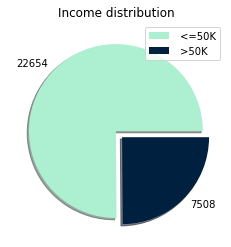

In [131]:
colors = ['#ADEFD1FF', '#00203FFF']
explode = [0, 0.1]
plt.pie(income, labels=income.values, colors=colors, explode = explode, shadow=True)
plt.title('Income distribution')
plt.legend(labels=income.index)

Figure 1: diagramme de distribution de revenu on peut constater ici que 3/4 des individus touchent moins que 50k comme revenu alors que seulement 1/4 dépasse 50k

In [132]:
sex = train.sex.value_counts()
sex

 Male      20380
 Female     9782
Name: sex, dtype: int64

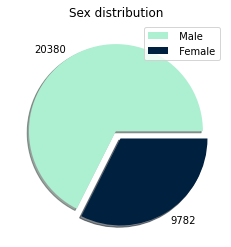

In [133]:
colors = ['#ADEFD1FF', '#00203FFF']
explode = [0, 0.1]
plt.pie(sex, labels=sex.values, colors=colors, explode = explode, shadow=True)
plt.title('Sex distribution')
plt.legend(labels=sex.index)

Figure 2: plus que deux tières du marché de travail est concuré par les hommes 

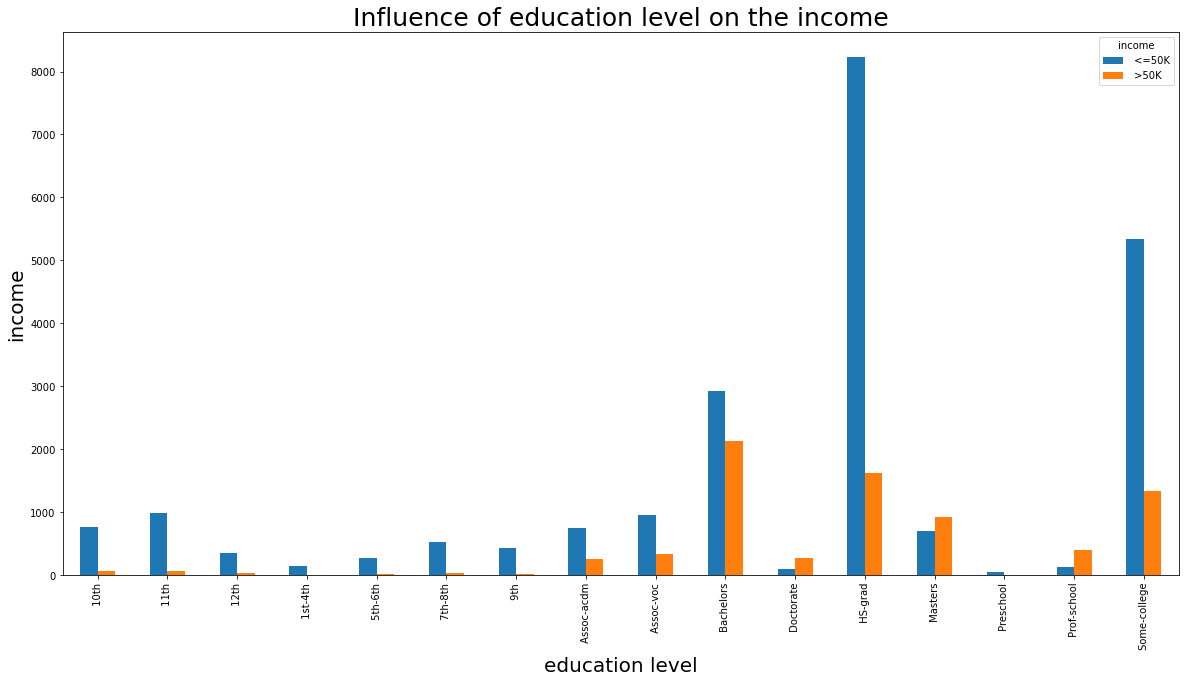

In [134]:
pd.crosstab(train.education, train.income).plot(kind='bar',stacked=False,figsize=(20,10))
plt.title('Influence of education level on the income',fontsize=25)
plt.ylabel('income',fontsize=20)
plt.xlabel("education level",fontsize=20)
plt.show()

Figure 2: Les gens ayant un niveau d'études avancée ont plus de chance d'avoir un revenu qui dépasse 50k et au même temps on peut constater avoir un niveau d'étude avancé ne guarantis pas avoir un revenue pértinant.

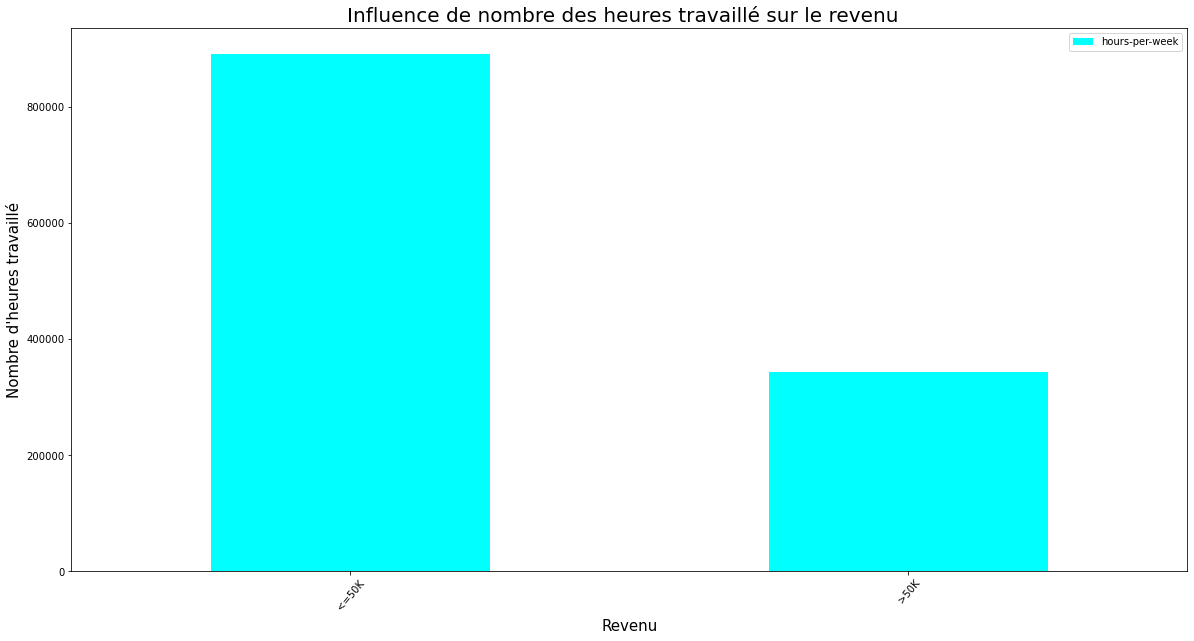

In [135]:
train[['income','hours-per-week']].groupby(["income"],axis=0).sum().plot(kind='bar',figsize=(20,10),color=['cyan'])
plt.xticks(rotation=50)
plt.title("Influence de nombre des heures travaillé sur le revenu  ",fontsize=20)
plt.ylabel("Nombre d'heures travaillé",fontsize=15)
plt.xlabel('Revenu',fontsize=15)
plt.show()

Figure 4: à partie de la figure 3 on peut constater que les gens ayant un revenu qui ne dépasse pas 50k travaillent plus d'heures par raport à ceux qui touche plus que 50k

Text(0.5, 1.0, "Influence de l'age sur le revenu  ")

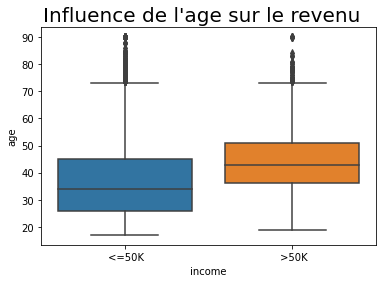

In [136]:
ax = sns.boxplot(x="income", y="age", data=train)
ax.set_title("Influence de l'age sur le revenu  ",fontsize=20)


Figure 5 : 
          les gens ayant un revenu moins de 50k sont agé de 35ans à la moyenne, alors que les gens ayant plus que 50k comme      revenus sont à l'age moyen de 45 ans
        
          L'age minimal pour toucher plus que 50K est de 38 ans.

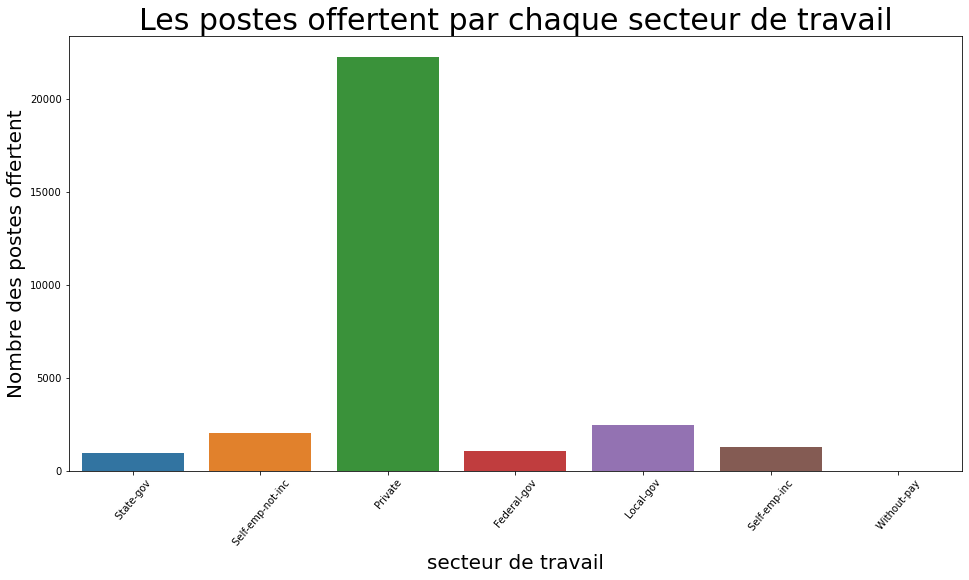

In [137]:
year = train['workclass'].unique()
years_count = train['workclass'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (16,8))
sns.barplot(x = year,
           y = years_count,
           palette = "tab10")
plt.xticks(rotation = 50)
plt.xlabel('secteur de travail',fontsize=20)
plt.ylabel('Nombre des postes offertent',fontsize=20)
plt.title('Les postes offertent par chaque secteur de travail',fontsize=30)
plt.show()

Figure 6 : la majorité des postes (plus de 20000 postes) offeretents sont situer dans le secteur privé

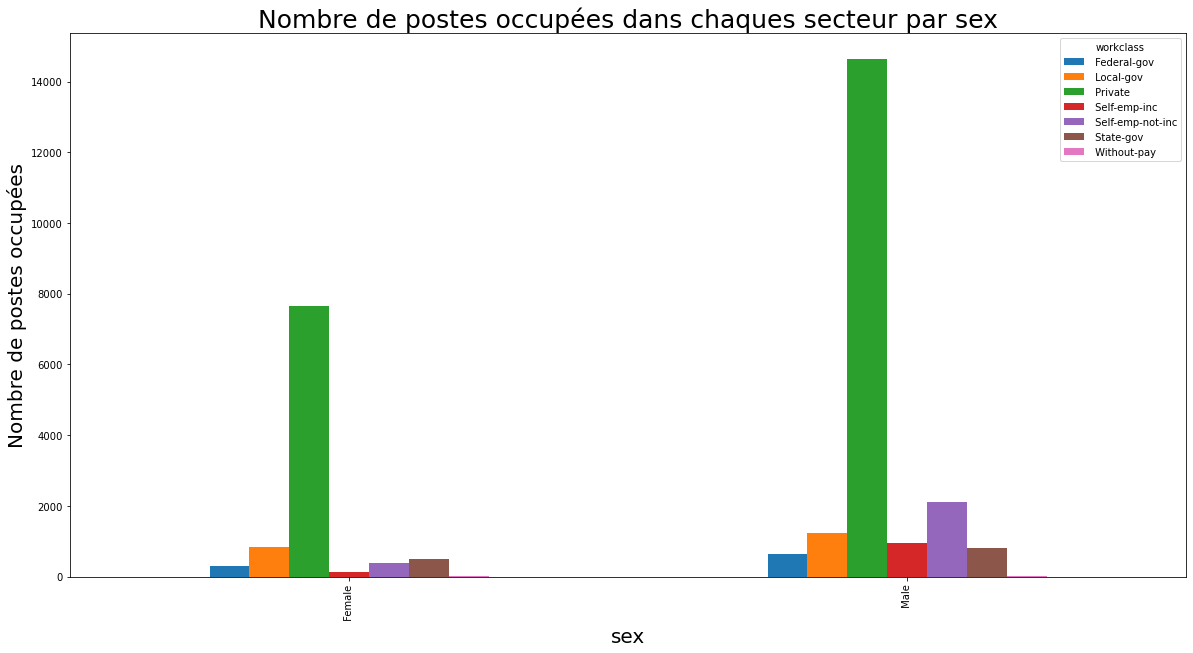

In [138]:
pd.crosstab(train.sex, train.workclass).plot(kind='bar',stacked=False,figsize=(20,10))
plt.title('Nombre de postes occupées dans chaques secteur par sex',fontsize=25)
plt.ylabel('Nombre de postes occupées',fontsize=20)
plt.xlabel("sex",fontsize=20)
plt.show()

Figure 7 : à partie de la figure on peut constater que les hommes conquéres les différentes secteurs de travaille par rapport au femmes 

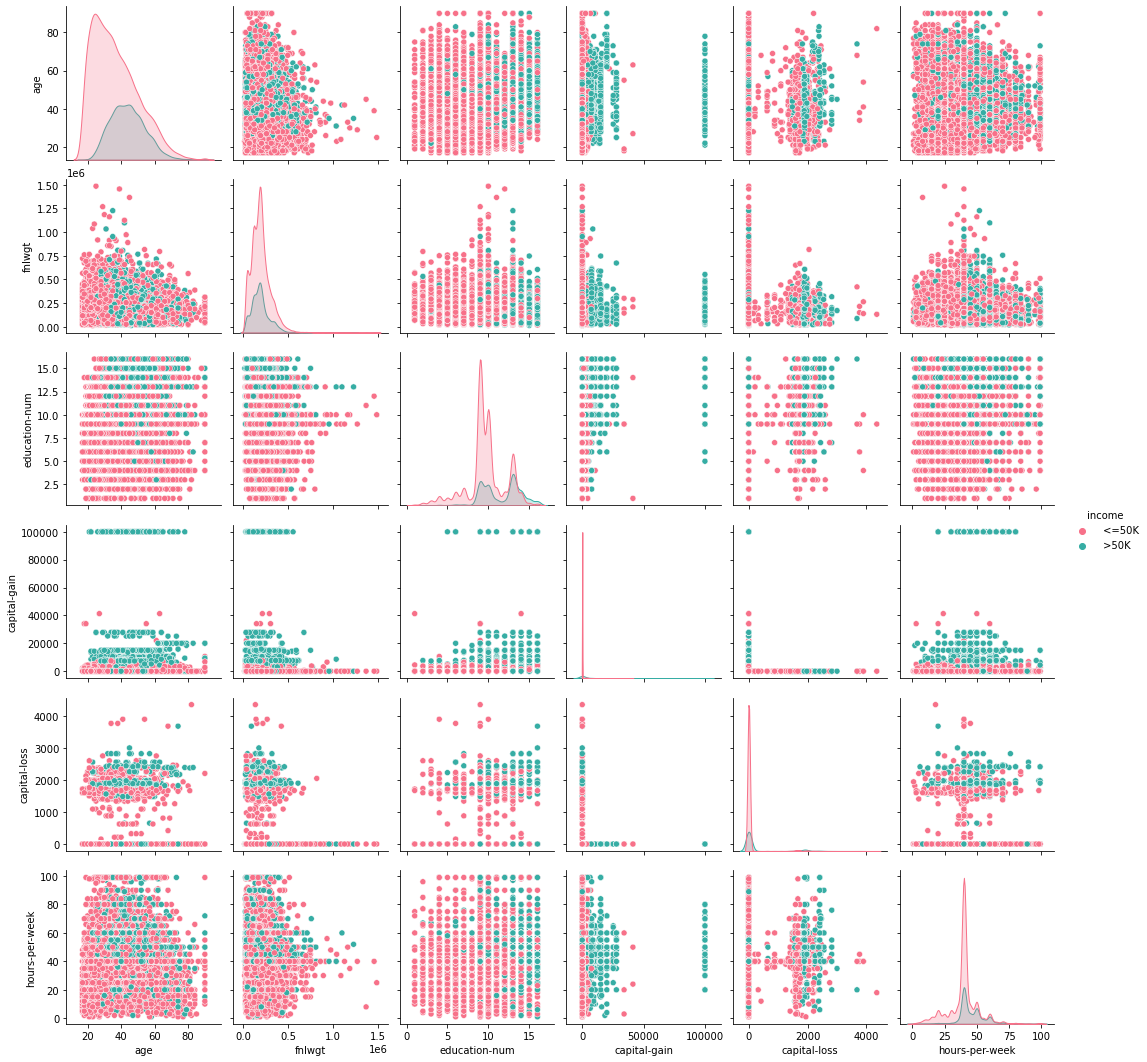

In [144]:
#présentation graphique des différentes variables deux à deux
#on importe la librairie graphique
import seaborn as sns
sns.pairplot(train,hue = 'income',palette = "husl", diag_kind = 'kde')

Figure 8: 

       8.1:En générale on peut clairement constater qu'on peut distinguer entre deux classe ou catégries les données qu'on a en se basant sur les différents feautres

In [164]:
import plotly.express as px
df = px.data.gapminder()

fig = px.scatter(train, x="education-num", y="income",size="education-num", color="workclass",hover_name="workclass", log_x=True, size_max=60)
fig.show()

Figure 9 : Les gens ayant un niveau scolaire avancé sont souvent des self employers

In [166]:
#convertion de income en 0 et 1
train['income'].replace([' <=50K',' >50K'],[1,0], inplace=True)

In [282]:
stats = train.select_dtypes(['float', 'int64']).drop(columns=['income'])
stats.head()

age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week
0   39   77516             13          2174             0              40
1   50   83311             13             0             0              13
2   38  215646              9             0             0              40
3   53  234721              7             0             0              40
4   28  338409             13             0             0              40

<AxesSubplot:>

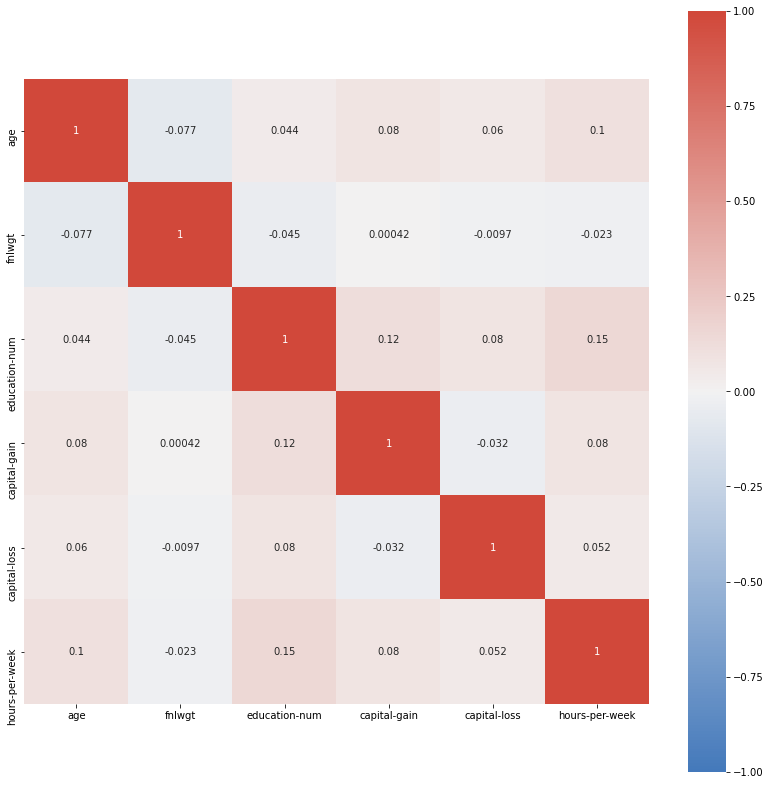

In [168]:
fig = plt.figure(figsize=(14,14))
corr = stats.corr()
sns.heatmap(corr,
            vmin=-1, vmax=1, center=0, 
            cmap=sns.diverging_palette(h_neg=250, h_pos=15, as_cmap=True),
            square=True, annot=True)

Figure 10: Il y a à peine corrélation entre toutes les variables numériques.

In [169]:
stats.describe().transpose()

count           mean            std      min        25%  \
age             30162.0      38.437902      13.134665     17.0      28.00   
fnlwgt          30162.0  189793.833930  105652.971529  13769.0  117627.25   
education-num   30162.0      10.121312       2.549995      1.0       9.00   
capital-gain    30162.0    1092.007858    7406.346497      0.0       0.00   
capital-loss    30162.0      88.372489     404.298370      0.0       0.00   
hours-per-week  30162.0      40.931238      11.979984      1.0      40.00   

                     50%       75%        max  
age                 37.0      47.0       90.0  
fnlwgt          178425.0  237628.5  1484705.0  
education-num       10.0      13.0       16.0  
capital-gain         0.0       0.0    99999.0  
capital-loss         0.0       0.0     4356.0  
hours-per-week      40.0      45.0       99.0

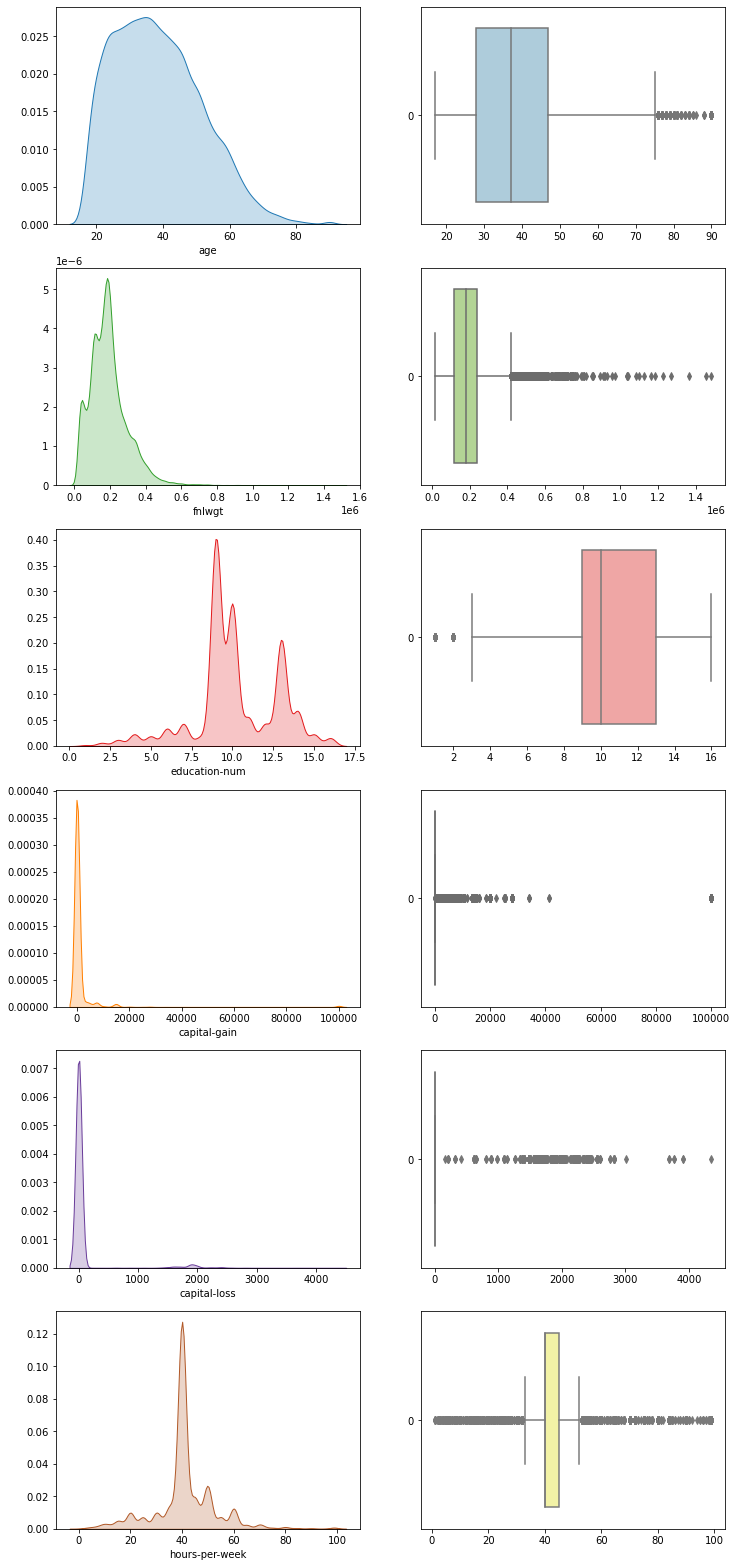

In [170]:
# Representation des informations de describe sous forme dh'un graphe
colors = list(sns.color_palette("Paired"))
fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(12,28))
for i in range(6):
    sns.kdeplot(stats.iloc[:, i], 
                shade = True, 
                color = colors[i*2+1], 
                ax=ax[i, 0]).set(ylabel = '', xlabel = stats.columns[i])
    
    sns.boxplot(data=stats.iloc[:, i],
                color = colors[i*2], orient="h",
                ax=ax[i, 1]).set(xlabel = '', ylabel = '')
plt.show()

# Data Preprocessing

In [171]:
train_final = pd.get_dummies(train)
train_final.head()

age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

   income  workclass_ Federal-gov  workclass_ Local-gov  workclass_ Private  \
0       1                       0                     0                   0   
1       1                       0                     0                   0   
2       1                       0                     0                   1   
3       1                       0                     0                   1   
4       1                       0                     0                   1   

   ...  native-country_ Portugal  native-country_ Puerto-Rico  \
0  ...                         0                            0   
1  ...                         0                            0   
2  ...                         0                            0   
3  ...                         0                            0   
4  ...                         0                            0   

   native-country_ Scotland  native-country_ South  native-country_ Taiwan  \
0                         0                      0                       0   
1                         0                      0                       0   
2                         0                      0                       0   
3                         0                      0                       0   
4                         0                      0                       0   

   native-country_ Thailand  native-country_ Trinadad&Tobago  \
0                         0                                0   
1                         0                                0   
2                         0                                0   
3                         0                                0   
4                         0                                0   

   native-country_ United-States  native-country_ Vietnam  \
0                              1                        0   
1                              1                        0   
2                              1                        0   
3                              1                        0   
4                              0                        0   

   native-country_ Yugoslavia  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0  

[5 rows x 105 columns]

In [172]:
X = train_final.drop(columns=['income'])
y = train_final['income']

## Répartition de données et creation des modèles

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [286]:
scaler = MinMaxScaler()

X_train_numeral = scaler.fit_transform(X_train.select_dtypes(['float', 'int64']))
X_train_s = pd.concat([pd.DataFrame(X_train_numeral, index=X_train.index, columns=X_train.columns[:6]), 
                       X_train.iloc[:, 6:]], axis=1)

X_test_numeral = scaler.transform(X_test.select_dtypes(['float', 'int64']))
X_test_s = pd.concat([pd.DataFrame(X_test_numeral, index=X_test.index, columns=X_test.columns[:6]),
                      X_test.iloc[:, 6:]], axis=1)

In [287]:
X_train.head()

age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
19355   46   91262             10             0             0              40   
1799    66  263637              6             0             0              40   
15630   34  214288              9             0             0              40   
20068   21  262819             10             0             0              20   
18234   69  269499              9             0             0               8   

       workclass_ Federal-gov  workclass_ Local-gov  workclass_ Private  \
19355                       0                     0                   1   
1799                        0                     0                   1   
15630                       0                     0                   1   
20068                       0                     0                   1   
18234                       0                     0                   1   

       workclass_ Self-emp-inc  ...  native-country_ Portugal  \
19355                        0  ...                         0   
1799                         0  ...                         0   
15630                        0  ...                         0   
20068                        0  ...                         0   
18234                        0  ...                         0   

       native-country_ Puerto-Rico  native-country_ Scotland  \
19355                            0                         0   
1799                             0                         0   
15630                            0                         0   
20068                            0                         0   
18234                            0                         0   

       native-country_ South  native-country_ Taiwan  \
19355                      0                       0   
1799                       0                       0   
15630                      0                       0   
20068                      0                       0   
18234                      0                       0   

       native-country_ Thailand  native-country_ Trinadad&Tobago  \
19355                         0                                0   
1799                          0                                0   
15630                         0                                0   
20068                         0                                0   
18234                         0                                0   

       native-country_ United-States  native-country_ Vietnam  \
19355                              0                        0   
1799                               1                        0   
15630                              1                        0   
20068                              1                        0   
18234                              1                        0   

       native-country_ Yugoslavia  
19355                           0  
1799                            0  
15630                           0  
20068                           0  
18234                           0  

[5 rows x 104 columns]

In [309]:
# function responsible for fitting and predicting algorithms given through lists.
def algoritm_score_list(show_processing=False, standardized=False):
    scores_list = []

    for algorithm in algorithms:
        if show_processing:
            print('processing ' + str(algorithm) + ' algorithm...')

        if standardized:
            X_tn = X_train_s
            X_tt = X_test_s
        else:
            X_tn = X_train
            X_tt = X_test
            
        A = algorithm.fit(X_tn, y_train)
        y_predict = A.predict(X_tt)
        accuracy = accuracy_score(y_test,y_predict)
        report=classification_report(y_test,y_predict)

        scores_list.append([A, accuracy, standardized])
        
        #Plot Confusion Matrix
        print(algorithm)
        plot_confusion_matrix(A,X_test,y_test)
        plt.show()
        print(report)
    print('all predictions finished')
    return scores_list

## Building models

In [310]:
algorithms = [LinearDiscriminantAnalysis(),
              LogisticRegression(solver='liblinear'), 
              KNeighborsClassifier()]

LinearDiscriminantAnalysis()


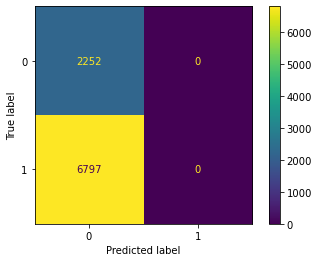

              precision    recall  f1-score   support

           0       0.73      0.57      0.64      2252
           1       0.87      0.93      0.90      6797

    accuracy                           0.84      9049
   macro avg       0.80      0.75      0.77      9049
weighted avg       0.83      0.84      0.83      9049

LogisticRegression(solver='liblinear')


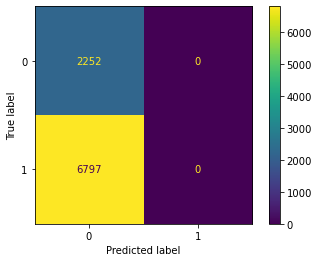

              precision    recall  f1-score   support

           0       0.74      0.60      0.66      2252
           1       0.88      0.93      0.90      6797

    accuracy                           0.85      9049
   macro avg       0.81      0.77      0.78      9049
weighted avg       0.84      0.85      0.84      9049

KNeighborsClassifier()


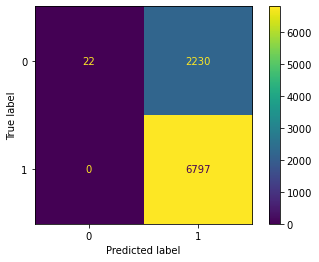

              precision    recall  f1-score   support

           0       0.65      0.59      0.62      2252
           1       0.87      0.90      0.88      6797

    accuracy                           0.82      9049
   macro avg       0.76      0.74      0.75      9049
weighted avg       0.81      0.82      0.82      9049

all predictions finished


In [311]:
default_alg_s = algoritm_score_list(standardized=True)

LinearDiscriminantAnalysis()


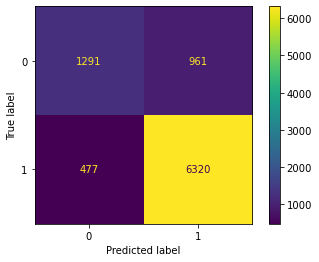

              precision    recall  f1-score   support

           0       0.73      0.57      0.64      2252
           1       0.87      0.93      0.90      6797

    accuracy                           0.84      9049
   macro avg       0.80      0.75      0.77      9049
weighted avg       0.83      0.84      0.83      9049

LogisticRegression(solver='liblinear')


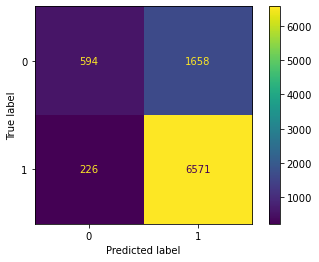

              precision    recall  f1-score   support

           0       0.72      0.26      0.39      2252
           1       0.80      0.97      0.87      6797

    accuracy                           0.79      9049
   macro avg       0.76      0.62      0.63      9049
weighted avg       0.78      0.79      0.75      9049

KNeighborsClassifier()


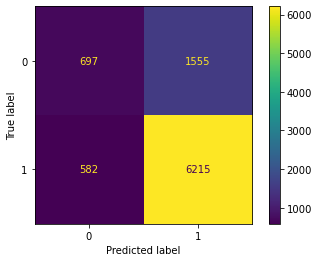

              precision    recall  f1-score   support

           0       0.54      0.31      0.39      2252
           1       0.80      0.91      0.85      6797

    accuracy                           0.76      9049
   macro avg       0.67      0.61      0.62      9049
weighted avg       0.74      0.76      0.74      9049

all predictions finished


In [312]:
default_alg = algoritm_score_list()

In [313]:
df_alg = pd.DataFrame(default_alg, columns=['algorithm', 'accuracy', 'standardized'])
df_alg = pd.concat([df_alg, 
                    pd.DataFrame(default_alg_s, columns=['algorithm', 'accuracy', 'standardized'])], 
                   axis=0, 
                   ignore_index=True)
df_alg.sort_values(by='accuracy', ascending=False)

algorithm  accuracy  standardized
4  LogisticRegression(solver='liblinear')  0.848160          True
0            LinearDiscriminantAnalysis()  0.841087         False
3            LinearDiscriminantAnalysis()  0.841087          True
5                  KNeighborsClassifier()  0.819759          True
1  LogisticRegression(solver='liblinear')  0.791800         False
2                  KNeighborsClassifier()  0.763841         False

On peut bien constater que standariser les données (centrés les valeurs autour de la moyenne) augmentes accuracy du modèle dans le cas de LogisticRegression et KNeighborsClassifier, alors que les données non standards ont aucune influence sur l'accuracy du modèle dans le cas de LinearDiscriminantAnalysis 

On remarque aussi dans le cas de standarisastion des données la matrice de confusion dévoile que même si l'accuracy de modèle q'augmente ça veut dire pas que le modèle est parfait ou meilleur la preuve c'est que le modèle élimine une catégorie toute entière par exemple le cas de LogisticRegression le modèle n'arrive pas à detercter un individu touche plus que 50k est trouvé qu'il la touche vraiment on a obtenu 0 prédiction pour une telle situation

Dans le cas de LinearDiscriminantAnalysis avec standarisation des données notre classifier est juste dans 50% des cas d'avoir un income >50k alors qu'il est juste dans plus que 90% des cas quand il s'agit d'un income <50k bien que le problème ici que notre modèle n'arrive pas à classifier la catégorie income <50k il attribut toujour la classe revenu >50k et de même pour LogisticRegression


Le même probleme se pose dans le cas de KNeighborsClassifier mais cette fois-ci avec une légère amélioration puisqu'il inclut les deux classes dans la classification


On peut conclure que la standarisation améliore l'accuracy du modèle mais ça veut pas dire que le modèle est meilleur

Dans le cas d'application des algoithmes sur des données non standarisé l'algorithme le plus performant est LinearDiscriminantAnalysis
avec une accuracy de 84% et une precision et recall meilleur.